<a href="https://colab.research.google.com/github/jogabenn/Actividades-Estrategia-de-Implementacion-de-Servicios-Tecnologicos/blob/main/Semana_3_y_4_Actividad_2_Mas_Expresiones_Regulares_y_Matrices_de_Conteo_y_tf-idf/A01793038_semanas3y4_actividad_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

###**Alumno: Jonathan Garza Bennet - A01793038**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [ ]:
import pandas as pd  
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

In [ ]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [ ]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

#Se asigna las stopwords de NLTK a mystopwords
mystopwords = stopwords.words('english')

#Se revisa si cada una de las palabras en negwords está presente en mystopwords
for word in negwords:
  if word in mystopwords:
    mystopwords.remove(word)           # si la palabra está presente, quitarla de la lista

#Se imprime la longitud y elementos de negwords para verificar resultados
print(len(negwords))
print(negwords)

#Se imprime la longitud y elementos de los stop words de NLTK para verificar resultados
print(len(stopwords.words('english')))
print(stopwords.words('english'))

# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(len(mystopwords))
print(mystopwords)

40
['no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about'

###**Cargamos los datos de Amazon**

In [ ]:
# Puedes modificar en dado caso la ruta de los archivos:

#Se extraen los archivos desde repositorio público de GitHub
url1 = 'https://raw.githubusercontent.com/jogabenn/Actividades-Estrategia-de-Implementacion-de-Servicios-Tecnologicos/main/Semana_3_y_4_Actividad_2_Mas_Expresiones_Regulares_y_Matrices_de_Conteo_y_tf-idf/amazon_cells_labelled.txt'
url2 = 'https://raw.githubusercontent.com/jogabenn/Actividades-Estrategia-de-Implementacion-de-Servicios-Tecnologicos/main/Semana_3_y_4_Actividad_2_Mas_Expresiones_Regulares_y_Matrices_de_Conteo_y_tf-idf/imdb_labelled.txt'
url3 = 'https://raw.githubusercontent.com/jogabenn/Actividades-Estrategia-de-Implementacion-de-Servicios-Tecnologicos/main/Semana_3_y_4_Actividad_2_Mas_Expresiones_Regulares_y_Matrices_de_Conteo_y_tf-idf/yelp_labelled.txt'

dfa = pd.read_csv(url1, sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv(url2, delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv(url3, sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1000, 2)


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [ ]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas, 
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748. 

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [ ]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores. 

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label). 

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [ ]:
tmpdfi = dfi.values.tolist()     # lista con los 748 registros.
newdfi=[]     # lista de salida que deberá tener los 1000 registros ya debidamente separados.



################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

#Ciclo para analizar cada elemento de tmpdfi
for elemento in tmpdfi:

  #Separar por salto de línea en caso de que exista
  lista1 = elemento[0].split('\n')

  #Crear lista nueva vacía para juntar todos los comentarios adicionales separados
  lista_nueva = []

  #Ciclo para analizar todas los posibles comentarios separados por salto de línea
  for i in range(0,len(lista1)):

    #Separar por tabulador en caso de que exista
    lista2 = lista1[i].split('\t')

    #Convertir a entero el segundo elemento de la separación por tabulador
    if i < len(lista1)-1:
      lista2[1] = int(lista2[1])

    else:
      #El último elemento ya está separado correctamente, sólo se junta con el último comentario encontrado
      lista2.append(elemento[1])

    #Se añade la lista resultante a la lista donde se acumulan todos los comentarios nuevos separados
    lista_nueva.append(lista2)

  #Se añade el resultado a la nueva lista por el método extend
  newdfi.extend(lista_nueva)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################


print('La nueva lista tiene 1000 elementos:', (len(newdfi)==1000))

La nueva lista tiene 1000 elementos: True


In [ ]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

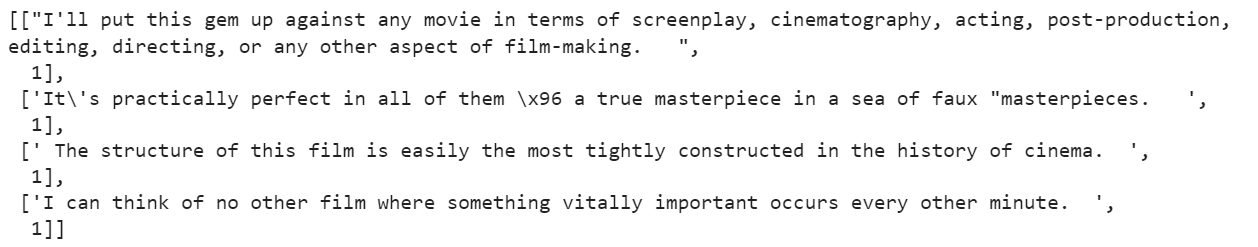

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [ ]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada 
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

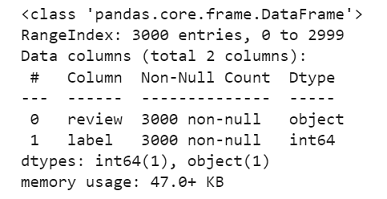

In [ ]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

0    1500
1    1500
Name: label, dtype: int64

In [ ]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos? 

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [ ]:
df.iloc[1788,:]   # verificando tu salida

review    10/10  
label           1
Name: 1788, dtype: object

########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**

*En el caso de comentarios con calificaciones expresas escritas con números, se podría implementar un algoritmo de limpieza que los traduzca a sus respectivas palabras, para poder después añadirlos como tokens que podrían contribuir a clasificar de forma directa un comentario positivo o uno negativo dependiendo de la combinación de números. En este caso, se podría traducir a 'ten out of ten', posteriormente después del proceso de limpieza, permanecerían los dos tokens 'ten' y se podría alimentar con ellos el algoritmo de clasificación. En el caso de este ejercicio en particular, debido a la baja cantidad de registros, eliminaría los comentarios de este tipo ya que su aportación al modelo sería mínima.*

##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [ ]:
 # Separamos la información: 
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series" 

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [ ]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

  #Se crea lista vacía para los tokens
  tokens = []

  #Se sustituyen todos los caracteres alfabéticos incluidos los que tienen acentos por espacios en blanco
  words = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', doc)
  
  #Todas las palabras encontradas se transforman a minúsculas y se separan individualmente por medio sus separadores
  words = words.lower().split()

  #Se asigna una copia del grupo de palabras a la lista de tokens
  tokens = words.copy()

  #Ciclo para revisar todas las palabras del comentario
  for word in words:

    #Si la palabra actual es una stopword o si su longitud es menor a dos, se elimina de la lista de tokens.
    if word in mystopwords or len(word) < 2:

      tokens.remove(word)

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

  return tokens

In [ ]:
# Aplicamos el proceso de limpieza y tokenización:

Xcleantok = [clean_tok(x) for x in X]   

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [ ]:
for x in Xcleantok[0:5]:
  print(x)

['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

#lista vacía para análisis visual
palabras = []

#ciclo para juntar todos los tokens previos en una lista
for tokens1 in Xcleantok:

  palabras.extend(tokens1)

#Set para eliminar repeticiones
dic = set(palabras)

#Imprimir resultados para análisis visual
print(sorted(dic))

#Después de una inspección visual se detectan algunas palabras con caracteres repetidos u erróneos:

#so soooo #good gooood #fox foxx #way waaaaay wayyyyy #frequently frequentyly

#Se importa el módulo PorterStemmer the NLTK
from nltk.stem import PorterStemmer

#Se crea un objeto de la clase PorterStemmer
ps = PorterStemmer()

#Definición de la función de limpieza adicional
def clean_doc(doc):

  #Se define lista vacía para los nuevos tokens
  tokens = []

  #Ciclo para la limpieza de los tokens
  for j in range(0,len(doc)):

    #Encontar todas las variantes de so, good, fox, way y frequently
    so = re.findall(r"so{2,}\b", doc[j])
    good = re.findall(r"go{2,}d{1,}\b", doc[j])
    fox = re.findall(r"fo{1,}x{1,}\b", doc[j])
    way = re.findall(r"wa{1,}y{1,}\b", doc[j])
    frequently = re.findall(r"frequent*[a-z]+ly\b", doc[j])

    #Si se encontraron variantes de 'so', reemplazarlas
    if len(so) > 0:

      doc[j] = 'so'
    
    #Si se encontraron variantes de 'good', reemplazarlas
    if len(good) > 0:

      doc[j] = 'good'

    #Si se encontraron variantes de 'fox', reemplazarlas
    if len(fox) > 0:

      doc[j] = 'fox'

    #Si se encontraron variantes de 'way', reemplazarlas
    if len(way) > 0:

      doc[j] = 'way'

    #Si se encontraron variantes de 'frequently', reemplazarlas
    if len(frequently) > 0:

      doc[j] = 'frequently'

    #Se aplica stemming lo cual nos llevará las palabras a su base, incluyendo remover las terminaciones 'ing','ed','s'
    doc[j] = ps.stem(doc[j])

  tokens.extend(doc)

  return tokens
  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

['aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', 'ackerman', 'acknowledged', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'activated', 'activesync', 'actor', 'actors', 'actress', 'actresses', 'actual', 'actually', 'ad', 'adams', 'adaptation', 'adapter', 'adapters', 'add', 'added', 'addition', 'additional', 'address', 'adhesive', 'admins', 'admiration', 'admitted', 'adorable', 'adrift', 'adventure', 'advertised', 'advise', 'aerial', 'aesthetically', 'affected', 'affleck', 'affordable', 'afraid', 'africa', 'afternoon', 'age',

In [ ]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]  

In [ ]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['no', 'way', 'plug', 'us', 'unless', 'go', 'convert'],
 ['good', 'case', 'excel', 'valu'],
 ['great', 'jawbon'],
 ['tie', 'charger', 'convers', 'last', 'minut', 'major', 'problem'],
 ['mic', 'great']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

#Listas vacías de los tokens positivos y negativos
pos_tok=[]
neg_tok=[] 

for x,c in zip(Xclean, Y):   
  if c==1:
    pos_tok.extend(x)   # tokens usados en comentarios positivos
  else: 
    neg_tok.extend(x)   # tokens usados en comentarios negativos

#Se juntan las palabras en solo string por cada clase para la nube de palabras.
pt = ' '.join(pos_tok)   
nt = ' '.join(neg_tok)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

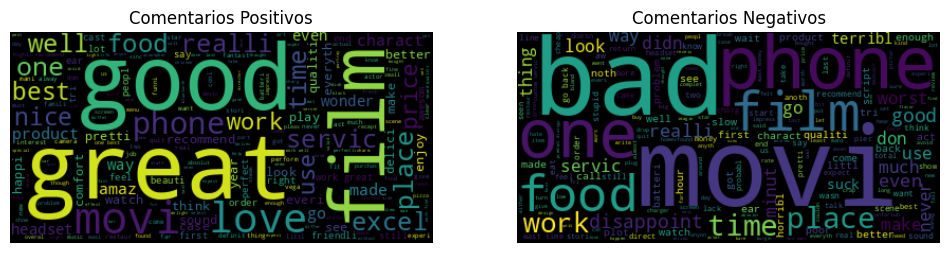

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:

#Módulos requeridos para la graficar la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Nube de palabras de comentarios positivos:
wordcloudnn = WordCloud().generate(pt)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Comentarios Positivos')

# Nube de palabras de comentarios negativos:
wordcloudnn = WordCloud().generate(nt)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Comentarios Negativos')

plt.show()

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**


*Se obseva que los tokens que tienen la mayoría de los comentarios positivos son:*

1. *Great*
2. *Good*
3. *Film*
4. *Love*
5. *Movi*

*Se obseva que los tokens que tienen la mayoría de los comentarios negativos son:*

1. *Movi*
2. *Bad*
3. *Phone*
4. *Food*
5. *Work*

*La palabra 'movi', corresponde a 'movie' como resultado del proceso de stemming. Otro de los resultados relevantes del proceso de steming es la palabra 'love' la cual regresó todas sus variantes a su forma base. Otra de las palabras más relevates, la cual fue sujeta al proceso de limpieza fue 'good'*.

###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente. 

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [ ]:
from collections import Counter

In [ ]:
midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 3159

(word,frequency):
[('not', 218), ('good', 165), ('movi', 140), ('great', 139), ('phone', 134), ('film', 130), ('work', 113), ('time', 102), ('like', 101), ('one', 100)]


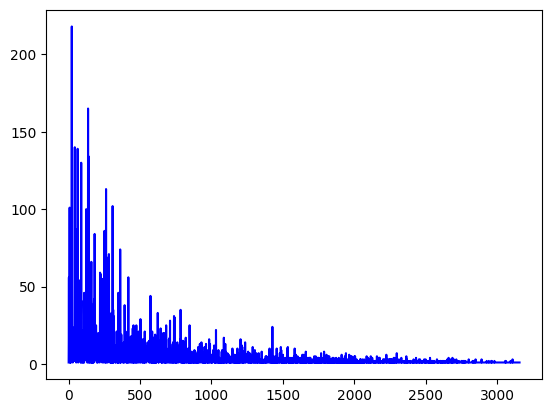

In [ ]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

#Frecuencia mínima deseada
min_freq = 10

#Copia de midiccionario para realizar operaciones
midicc = midiccionario.copy()

#Ciclo para filtar los elementos con base a su frecuencia
for x in midiccionario:   
  if midiccionario[x] < min_freq:
    del midicc[x]   #Eliminar tokens con menos frecuencia que la deseada

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 278
[('star', 18), ('don', 56), ('much', 39), ('better', 38), ('peopl', 23)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [ ]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [ ]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después 
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'don', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'wast']
Después: ['star', 'don', 'much', 'better', 'peopl', 'like', 'wast']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['special', 'suck']
Antes: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terribl', 'job']
Después: ['not', 'felt', 'server', 'terribl', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [ ]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

star don much better peopl like wast
special suck
not felt server terribl job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [ ]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores 
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)     
val_x_count = countvectorizer.transform(val_x_docs) 
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)  
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   wast  special  suck  not  felt  server  terribl  job  call  steak  \
0     1        0     0    0     0       0        0    0     0      0   
1     0        1     1    0     0       0        0    0     0      0   
2     0        0     0    1     1       1        1    1     0      0   

   understand  howev  
0           0      0  
1           0      0  
2           0      0  


In [ ]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 98.8%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios. 

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:

#Se importa módulo para creación de las matrices TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Se crea un objeto TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(vocabulary=mivocab, norm=None)

#Se entrena el conjunto de entrenmaniento y se transforman todos los conjuntos
train_x_tfidf = tfidfvectorizer.fit_transform(train_x_docs)
val_x_tfidf = tfidfvectorizer.transform(val_x_docs)
test_x_tfidf = tfidfvectorizer.transform(test_x_docs)

#Se asigna el resultado del conjunto de entrenamiento a un dataframe de Pandas para visualizar parte del resultado
count_tokens_tfidf = tfidfvectorizer.get_feature_names_out()
df_countvect_tfidf = pd.DataFrame(data = train_x_tfidf.toarray(),  columns = count_tokens_tfidf)  
print(df_countvect_tfidf.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

       wast   special      suck       not      felt    server   terribl  \
0  5.153661  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  6.011111  5.605646  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  3.322293  6.165262  5.942118  5.431293   

        job  call  steak  understand  howev  
0  0.000000   0.0    0.0         0.0    0.0  
1  0.000000   0.0    0.0         0.0    0.0  
2  6.011111   0.0    0.0         0.0    0.0  


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount). 

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo. 

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:

#Se importa el métdo de GridSearchCV para búsqueda de híperparámetros
from sklearn.model_selection import GridSearchCV

#Se define el modelo de regresion logística
modeloLRcountgrid = LogisticRegression(max_iter=1000)

#Se definen los híperparámetros de búsqueda
dicc_grid_LR = {'C': [0.001, 0.005, 0.01, 0.015, 0.02]
             }

#Se define el método de grid search
grid_modeloLRcount = GridSearchCV(estimator=modeloLRcountgrid, 
                    param_grid=dicc_grid_LR,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloLRcount.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Regresión Logística son:\n')
print('C: {}\n'.format(grid_modeloLRcount.best_params_['C']))

modeloLRcount = grid_modeloLRcount

#Se define el modelo de bosques aleatorios
modeloRFcountgrid = RandomForestClassifier(max_depth=None)

#Se definen los híperparámetros de búsqueda
dicc_grid_RF = {'n_estimators': [100, 120, 140],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'ccp_alpha': [0.005, 0.01, 0.0015],
             }

#Se define el método de grid search
grid_modeloRFcount = GridSearchCV(estimator=modeloRFcountgrid, 
                    param_grid=dicc_grid_RF,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloRFcount.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Bosques Aleatorios son:\n')
print('n_estimators: {}\n'.format(grid_modeloRFcount.best_params_['n_estimators']))
print('criterion: {}\n'.format(grid_modeloRFcount.best_params_['criterion']))
print('ccp_alpha: {}\n'.format(grid_modeloRFcount.best_params_['ccp_alpha']))

modeloRFcount = grid_modeloRFcount

#Se define el modelo de Multinomial Naive Bayes
modeloNBcountgrid = MultinomialNB()

#Se definen los híperparámetros de búsqueda
dicc_grid_NB = {'alpha': [1, 2, 3, 4, 5]
             }

#Se define el método de grid search
grid_modeloNBcount = GridSearchCV(estimator=modeloNBcountgrid, 
                    param_grid=dicc_grid_NB,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloNBcount.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Multinomial Naive Bayes son:\n')
print('alpha: {}\n'.format(grid_modeloNBcount.best_params_['alpha']))

modeloNBcount = grid_modeloNBcount





# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

Los mejores híperparametros del Modelo de Regresión Logística son:

C: 0.02

Los mejores híperparametros del Modelo de Bosques Aleatorios son:

n_estimators: 140

criterion: gini

ccp_alpha: 0.0015

Los mejores híperparametros del Modelo de Multinomial Naive Bayes son:

alpha: 3

LR: Train-accuracy: 79.14%
LR: Val-accuracy: 79%

RF: Train-accuracy: 83.19%
RF: Val-accuracy: 82.22%

NB: Train-accuracy: 81.67%
NB: Val-accuracy: 80.00%


In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloRFcount # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 77.33%

Matriz de confusión con el mejor modelo de Conteo:
[[191  25]
 [ 77 157]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.42444444 0.05555556]
 [0.17111111 0.34888889]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

#Se define el modelo de regresion logística
modeloLRtfidfgrid = LogisticRegression(max_iter=1000)

#Se definen los híperparámetros de búsqueda
dicc_grid_LRtfidf = {'C': [0.001, 0.005, 0.01, 0.015, 0.02]
             }

#Se define el método de grid search
grid_modeloLRtfidf = GridSearchCV(estimator=modeloLRtfidfgrid, 
                    param_grid=dicc_grid_LRtfidf,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloLRtfidf.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Regresión Logística son:\n')
print('C: {}\n'.format(grid_modeloLRtfidf.best_params_['C']))

modeloLRtfidf = grid_modeloLRtfidf

#Se define el modelo de bosques aleatorios
modeloRFtfidfgrid = RandomForestClassifier(max_depth=None)

#Se definen los híperparámetros de búsqueda
dicc_grid_RFtfidf = {'n_estimators': [100, 120, 140],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'ccp_alpha': [0.005, 0.01, 0.0015],
             }

#Se define el método de grid search
grid_modeloRFtfidf = GridSearchCV(estimator=modeloRFtfidfgrid, 
                    param_grid=dicc_grid_RFtfidf,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloRFtfidf.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Bosques Aleatorios son:\n')
print('n_estimators: {}\n'.format(grid_modeloRFtfidf.best_params_['n_estimators']))
print('criterion: {}\n'.format(grid_modeloRFtfidf.best_params_['criterion']))
print('ccp_alpha: {}\n'.format(grid_modeloRFtfidf.best_params_['ccp_alpha']))

modeloRFtfidf = grid_modeloRFtfidf

#Se define el modelo de Multinomial Naive Bayes
modeloNBtfidfgrid = MultinomialNB()

#Se definen los híperparámetros de búsqueda
dicc_grid_NBtfidf = {'alpha': [1, 2, 3, 4, 5]
             }

#Se define el método de grid search
grid_modeloNBtfidf = GridSearchCV(estimator=modeloNBtfidfgrid, 
                    param_grid=dicc_grid_NBtfidf,
                    scoring='accuracy')

#Se buscan los mejores hiperparámetros y se entrena el modelo
grid_modeloNBtfidf.fit(train_x_count, y_train)

print('Los mejores híperparametros del Modelo de Multinomial Naive Bayes son:\n')
print('alpha: {}\n'.format(grid_modeloNBtfidf.best_params_['alpha']))

modeloNBtfidf = grid_modeloNBtfidf





# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Los mejores híperparametros del Modelo de Regresión Logística son:

C: 0.02

Los mejores híperparametros del Modelo de Bosques Aleatorios son:

n_estimators: 100

criterion: entropy

ccp_alpha: 0.0015

Los mejores híperparametros del Modelo de Multinomial Naive Bayes son:

alpha: 3

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 81.00%
LR: Val-accuracy: 81%

RF: Train-accuracy: 87.71%
RF: Val-accuracy: 82.89%

NB: Train-accuracy: 81.62%
NB: Val-accuracy: 78.89%


In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloLRtfidf # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 77.78%

Matriz de confusión con el mejor modelo Tf-idf:
[[180  36]
 [ 64 170]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.4        0.08      ]
 [0.14222222 0.37777778]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad. 

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**

*Con está práctica se pudieron aplicar todos los conceptos de la semana 3 y 4: limpieza, tokenización y creación de diccionarios con la ayuda del uso de expresiones regulares y stemming. Posteriormente, se procedió a filtrar los diccionarios por medio de las frecuencias de aparición de los tokens en el corpus, dejando sólo los elementos que aportaron más valor. Se trabajaron también dos ejercios de clasificación después de crear las matrices DTM por medio del método de conteo y Tf-idf. Se utilizó el método de GridSearchCV en los ejercicios de optimización de hiperparámetros para automatizar hasta cierto nivel el proceso y por lo tanto encontrar de forma más rápida los mejores híperparametros dentro de la red de búsqueda. El diccionario se filtró por primera vez para contener sólamente tokens con 25 veces de frecuencia de aparición. Esta selección a pesar del empleo del método de GridSearchCV, no resultó en una exactitud mucho mayor al 70% en el conjunto de prueba para ningún modelo. Se decidió aumentar el tamaño del diccionario por una frecuencia de aparición de tokens igual o mayor a 10 sin cambiar el código, los método de búsqueda de híperparametros se ajustaron a esta nueva condición, resultando en nuevos valores para los mismos y se logró una exactitud casi del 78% empleando el método de Bosques Aleatorios, para la matriz Tf-idf. También se logró un incremento en la exactitud de la matriz por conteo del 70% al 77%, sin embargo el desempeño de Tf-idf fue superior por 1%.*

*El empleo del filtrado Tf-idf, permitió establecer los pesos de cada token de una forma más balanceada con respecto a su frecuencia de aparición en la totalidad del documento. Lo anterior, permitió alcanzar un ligero incremento en la exactitud del modelo, ya que le dimos herramientas al clasificador para que pudiera diferenciar de mejor forma las contribuciones de los tokens hacia una salida postiva o negativa*.

*Con relación a los resultados de las matrices de confusión por medio de ambos métodos, Tf-idf obtuvo valor menor de clasificaciones verdaderas positivas, pero mayor en verdaderas negativas, logrando una cantidad neta de clasificaciones correctas mayor que el método de conteo. Se logró reducir el número de clasificaciones falsas negativas y se incrementó proporcionalmente el número falsos positivos. Al igual que lo descrito anteriormente, el valor neto clasificaciones incorrectas es menor que por el método de conteo. Lo anterior en resumen, implica que el método Tf-idf es mejor para los algoritmos de clasificación, para diferenciar mejor las clases negativas en general que el método de conteo a cambio de una ligera degradación en la clasificación de clases positivas.*

*Con respecto a las implicaciones que tiene cada una de las clasificaciones incorrectas, se tiene qué considerar qué clase es más importante para clasificar de forma correcta para poder sacrificar un poco la exactitud de una en favor de otra. Para este ejemplo, se tiene mayor facilidad para clasificar correctamente la clase negativa que la positiva. En caso de que se deseara lo contrario, se podría penalizar el algoritmo de clasificación en favor de la clase positiva o viceversa dependiendo de lo que se necesite.*

###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**